## Setup

In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl

## Simulation

In [3]:
env = virl.Epidemic(stochastic=False, noisy=False)
"""
Args:
    stochastic (bool): Is the infection rate sampled from some distribution at the beginning of each episode (default: False)?
    noisy (bool): Is the state a noisy estimate of the true state (default: False)?
    problem_id (int): Deterministic parameterization of the epidemic (default: 0).
"""

states = []
rewards = []
done = False

s = env.reset()
states.append(s)
while not done:
    #s, r, done, i = env.step(action=0) # deterministic agent
    s, r, done, i = env.step(action=np.random.choice(env.action_space.n))
    states.append(s)
    rewards.append(r)

## Analysis

total reward -1.487987527159615


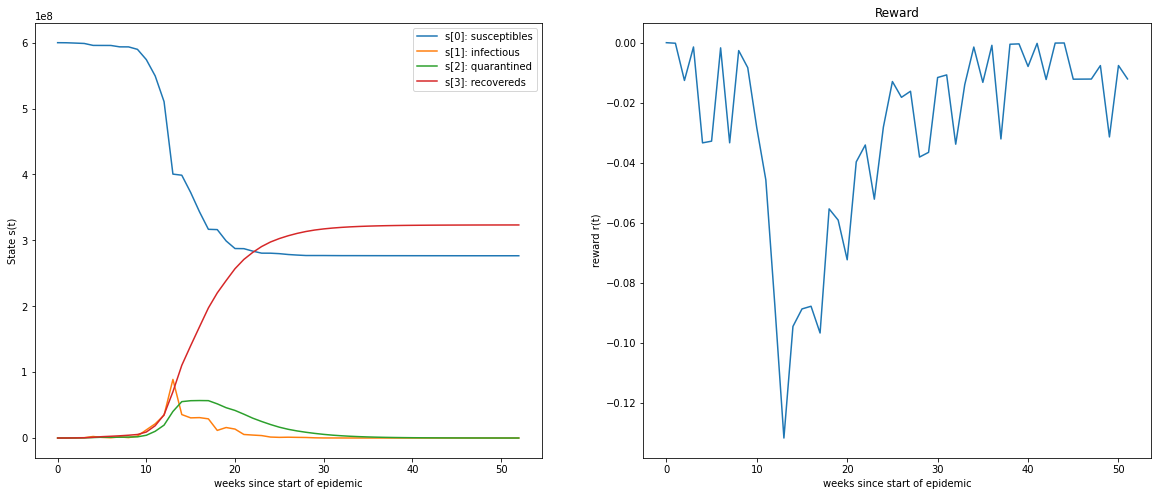

In [4]:

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
states = np.array(states)
for i in range(4):
    axes[0].plot(states[:,i], label=labels[i]);
axes[0].set_xlabel('weeks since start of epidemic')
axes[0].set_ylabel('State s(t)')
axes[0].legend()
axes[1].plot(rewards);
axes[1].set_title('Reward')
axes[1].set_xlabel('weeks since start of epidemic')
axes[1].set_ylabel('reward r(t)')

print('total reward', np.sum(rewards))